# Hello

This code is particularly original, with no instructions from books or classes. You may find it curious because of this, but I put all of my quantitative research into practice, and Storytelling can be found at the URL below.

https://public.tableau.com/app/profile/atos.reis/viz/MomentumStrategy-BrazilianStockMarketV2/Histria1

# Set Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import pandas.tseries.offsets
from pandas.tseries.offsets import CustomBusinessMonthEnd

In [2]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

# Import Data

In [3]:
df = pd.read_csv('C:/')
df = df.drop('Unnamed: 0', 1)
df

C:\Users\Atos\AppData\Local\Temp/ipykernel_14168/1090634594.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0', 1)


,date,open,high,low,close,vol,ticker
0,28/10/2016,19.03,19.49,18.66,18.94,6342600.00,AALR3
1,31/10/2016,18.93,18.94,17.27,17.81,2523300.00,AALR3
2,01/11/2016,17.81,18.13,16.92,17.65,996200.00,AALR3
3,03/11/2016,17.75,17.99,17.07,17.74,621000.00,AALR3
4,04/11/2016,17.70,17.87,17.47,17.51,389800.00,AALR3
...,...,...,...,...,...,...,...
464085,23/12/2021,20.75,20.75,20.25,20.33,1731000.00,YDUQ3
464086,27/12/2021,20.45,20.82,20.05,20.07,1809000.00,YDUQ3
464087,28/12/2021,20.15,20.89,20.01,20.86,1710500.00,YDUQ3
464088,29/12/2021,20.86,21.18,20.26,20.32,1342300.00,YDUQ3


In [4]:
df.rename(columns={'date': 'datetime', 'vol': 'volume'}, inplace=True)
df

,datetime,open,high,low,close,volume,ticker
0,28/10/2016,19.03,19.49,18.66,18.94,6342600.00,AALR3
1,31/10/2016,18.93,18.94,17.27,17.81,2523300.00,AALR3
2,01/11/2016,17.81,18.13,16.92,17.65,996200.00,AALR3
3,03/11/2016,17.75,17.99,17.07,17.74,621000.00,AALR3
4,04/11/2016,17.70,17.87,17.47,17.51,389800.00,AALR3
...,...,...,...,...,...,...,...
464085,23/12/2021,20.75,20.75,20.25,20.33,1731000.00,YDUQ3
464086,27/12/2021,20.45,20.82,20.05,20.07,1809000.00,YDUQ3
464087,28/12/2021,20.15,20.89,20.01,20.86,1710500.00,YDUQ3
464088,29/12/2021,20.86,21.18,20.26,20.32,1342300.00,YDUQ3


In [5]:
# # object to datatype 
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df.dtypes

datetime    datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume             float64
ticker              object
dtype: object

In [7]:
# #slice by year
df['datetime'] = df.loc[df['datetime'] > pd.to_datetime('2017-01-01', format='%Y-%m-%d'), 'datetime'].sort_values(ascending=True)
df.dropna(inplace=True)

In [8]:
df

,datetime,open,high,low,close,volume,ticker
43,2017-02-01,14.42,14.68,14.20,14.40,35900.00,AALR3
44,2017-03-01,14.54,14.85,14.37,14.70,357200.00,AALR3
45,2017-04-01,14.70,14.83,14.61,14.70,117100.00,AALR3
46,2017-05-01,14.70,15.14,14.70,15.14,124300.00,AALR3
47,2017-06-01,15.07,15.24,14.73,15.24,151000.00,AALR3
...,...,...,...,...,...,...,...
464085,2021-12-23,20.75,20.75,20.25,20.33,1731000.00,YDUQ3
464086,2021-12-27,20.45,20.82,20.05,20.07,1809000.00,YDUQ3
464087,2021-12-28,20.15,20.89,20.01,20.86,1710500.00,YDUQ3
464088,2021-12-29,20.86,21.18,20.26,20.32,1342300.00,YDUQ3


# Select 40 higher volume stocks

In [9]:
df1 = df[['ticker','volume']].sort_values('volume', ascending=False)
list_40 = df1.ticker.drop_duplicates(keep='first').head(40)
list_40.values

array(['VVAR3', 'PETR4', 'MGLU3', 'COGN3', 'IRBR3', 'CIEL3', 'HAPV3',
       'VALE3', 'PRIO3', 'LAME4', 'CPLE6', 'ABEV3', 'PETR3', 'BBDC4',
       'BRML3', 'EMBR3', 'CCRO3', 'ITSA4', 'ITUB4', 'BIDI4', 'BBAS3',
       'CSAN3', 'BPAC11', 'JBSS3', 'LWSA3', 'SAPR4', 'USIM5', 'BRDT3',
       'BRFS3', 'DMMO3', 'BRAP4', 'NTCO3', 'LAME3', 'AZUL4', 'CMIG4',
       'SULA11', 'TOTS3', 'NEOE3', 'CSNA3', 'ENEV3'], dtype=object)

In [10]:
df = df.dropna()
df

,datetime,open,high,low,close,volume,ticker
43,2017-02-01,14.42,14.68,14.20,14.40,35900.00,AALR3
44,2017-03-01,14.54,14.85,14.37,14.70,357200.00,AALR3
45,2017-04-01,14.70,14.83,14.61,14.70,117100.00,AALR3
46,2017-05-01,14.70,15.14,14.70,15.14,124300.00,AALR3
47,2017-06-01,15.07,15.24,14.73,15.24,151000.00,AALR3
...,...,...,...,...,...,...,...
464085,2021-12-23,20.75,20.75,20.25,20.33,1731000.00,YDUQ3
464086,2021-12-27,20.45,20.82,20.05,20.07,1809000.00,YDUQ3
464087,2021-12-28,20.15,20.89,20.01,20.86,1710500.00,YDUQ3
464088,2021-12-29,20.86,21.18,20.26,20.32,1342300.00,YDUQ3


# Create new DF with selected stocks

In [11]:
df = df[df.ticker.isin(['VVAR3', 'PETR4', 'MGLU3', 'COGN3', 'IRBR3', 'CIEL3', 'HAPV3',
       'VALE3', 'PRIO3', 'LAME4', 'CPLE6', 'ABEV3', 'PETR3', 'BBDC4',
       'BRML3', 'EMBR3', 'CCRO3', 'ITSA4', 'ITUB4', 'BIDI4', 'BBAS3',
       'CSAN3', 'BPAC11', 'JBSS3', 'LWSA3', 'SAPR4', 'USIM5', 'BRDT3',
       'BRFS3', 'DMMO3', 'BRAP4', 'NTCO3', 'LAME3', 'AZUL4', 'CMIG4',
       'SULA11', 'TOTS3', 'NEOE3', 'CSNA3', 'ENEV3'])]

In [12]:
df.ticker.unique().size

40

In [13]:
df.ticker.unique()

array(['ABEV3', 'AZUL4', 'BBAS3', 'BBDC4', 'BIDI4', 'BPAC11', 'BRAP4',
       'BRDT3', 'BRFS3', 'BRML3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3',
       'CPLE6', 'CSAN3', 'CSNA3', 'DMMO3', 'EMBR3', 'ENEV3', 'HAPV3',
       'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'LAME3', 'LAME4', 'LWSA3',
       'MGLU3', 'NEOE3', 'NTCO3', 'PETR3', 'PETR4', 'PRIO3', 'SAPR4',
       'SULA11', 'TOTS3', 'USIM5', 'VALE3', 'VVAR3'], dtype=object)

In [14]:
df

,datetime,open,high,low,close,volume,ticker
7272,2017-02-01,14.23,14.51,14.16,14.20,4265400.00,ABEV3
7273,2017-03-01,14.37,14.52,14.32,14.49,9535500.00,ABEV3
7274,2017-04-01,14.51,14.51,14.31,14.38,9426500.00,ABEV3
7275,2017-05-01,14.38,14.59,14.35,14.45,11555800.00,ABEV3
7276,2017-06-01,14.45,14.49,14.25,14.33,7863200.00,ABEV3
...,...,...,...,...,...,...,...
455429,2021-09-08,12.28,12.75,12.26,12.71,26796400.00,VVAR3
455430,2021-10-08,12.76,13.06,12.69,12.80,28060000.00,VVAR3
455431,2021-11-08,12.88,13.02,12.45,13.02,30918700.00,VVAR3
455432,2021-12-08,12.50,12.52,11.91,12.07,100321100.00,VVAR3


# Reshape DF

In [15]:
df.set_index(['datetime', 'ticker'], inplace=True)

In [16]:
df = df.loc[:, ['close']]
df

,,close
datetime,ticker,
2017-02-01,ABEV3,14.20
2017-03-01,ABEV3,14.49
2017-04-01,ABEV3,14.38
2017-05-01,ABEV3,14.45
2017-06-01,ABEV3,14.33
...,...,...
2021-09-08,VVAR3,12.71
2021-10-08,VVAR3,12.80
2021-11-08,VVAR3,13.02


In [17]:
# Create log_return to identify momentum
df.reset_index(inplace=True)
df['log_ret'] =  np.log(df.close) - np.log(df.close.shift(1))
df.dropna(inplace=True)
df

,datetime,ticker,close,log_ret
1,2017-03-01,ABEV3,14.49,0.02
2,2017-04-01,ABEV3,14.38,-0.01
3,2017-05-01,ABEV3,14.45,0.00
4,2017-06-01,ABEV3,14.33,-0.01
5,2017-09-01,ABEV3,14.39,0.00
...,...,...,...,...
46537,2021-09-08,VVAR3,12.71,0.03
46538,2021-10-08,VVAR3,12.80,0.01
46539,2021-11-08,VVAR3,13.02,0.02
46540,2021-12-08,VVAR3,12.07,-0.08


In [18]:
#set index
df['datetime'] = df['datetime'].astype('string')
df.set_index(['datetime'], inplace=True)

In [19]:
df

,ticker,close,log_ret
datetime,,,
2017-03-01,ABEV3,14.49,0.02
2017-04-01,ABEV3,14.38,-0.01
2017-05-01,ABEV3,14.45,0.00
2017-06-01,ABEV3,14.33,-0.01
2017-09-01,ABEV3,14.39,0.00
...,...,...,...
2021-09-08,VVAR3,12.71,0.03
2021-10-08,VVAR3,12.80,0.01
2021-11-08,VVAR3,13.02,0.02


In [20]:
#df.loc[df['datetime']== '2021-12-30']

In [21]:
df = df.loc[['2017-01-31',
 '2017-02-24',       
 '2017-03-31',
 '2017-04-28',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',       
 '2017-09-29',
 '2017-10-31',
 '2017-11-30',
 '2017-12-28',
 '2017-01-31',
 '2017-07-31',
 '2018-01-31',       
 '2018-02-28',
 '2018-03-29',
 '2018-04-30',
 '2018-05-30',
 '2018-06-29',
 '2018-07-31',
 '2018-08-31',
 '2018-09-28',
 '2018-10-31',
 '2018-11-30',
 '2018-12-28',
 '2019-01-31',
 '2019-02-28',
 '2019-03-29',
 '2019-04-30',
 '2019-05-31',
 '2019-06-28',
 '2019-07-31',
 '2019-08-30',
 '2019-09-30',
 '2019-10-31',
 '2019-11-29',
 '2019-12-30',
 '2020-01-31',
 '2020-02-28',
 '2020-03-31',
 '2020-04-30',
 '2020-05-29',
 '2020-06-30',
 '2020-07-31',
 '2020-08-31',
 '2020-09-30',
 '2020-10-30',
 '2020-11-30',
 '2020-12-30',
 '2021-01-29',
 '2021-02-26',
 '2021-03-31',
 '2021-04-30',
 '2021-05-31',
 '2021-06-30',
 '2021-07-30',
 '2021-08-31',
 '2021-09-30',
 '2021-10-29',
 '2021-11-30',
 '2021-12-30',]]

In [22]:
df

,ticker,close,log_ret
datetime,,,
2017-01-31,ABEV3,15.04,0.01
2017-01-31,BBAS3,25.32,0.02
2017-01-31,BBDC4,15.59,0.01
2017-01-31,BRAP4,5.90,0.01
2017-01-31,BRFS3,44.46,0.01
...,...,...,...
2021-12-30,SAPR4,3.87,-0.00
2021-12-30,SULA11,27.49,0.07
2021-12-30,TOTS3,28.64,0.03


# Create pivot table for close and log

In [23]:
# Create pivot table for log_return

df_log =  df.pivot_table(values='log_ret', index='datetime', columns='ticker', fill_value= 0)
df_log

ticker,ABEV3,AZUL4,BBAS3,BBDC4,BIDI4,BPAC11,BRAP4,BRDT3,BRFS3,BRML3,...,NTCO3,PETR3,PETR4,PRIO3,SAPR4,SULA11,TOTS3,USIM5,VALE3,VVAR3
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-31,0.01,0.00,0.02,0.01,0.00,0.00,0.01,0.00,0.01,0.07,...,-0.02,0.00,0.01,0.00,0.03,-0.02,-0.01,0.04,-0.00,0.02
2017-02-24,-0.02,0.00,-0.01,-0.01,0.00,0.01,0.01,0.00,0.00,-0.01,...,0.02,-0.03,-0.02,0.00,0.03,-0.03,0.01,-0.02,-0.01,0.02
2017-03-31,-0.00,0.00,-0.01,-0.01,0.00,0.00,-0.00,0.00,0.00,0.02,...,0.01,0.00,0.00,0.00,0.04,-0.00,0.02,0.01,-0.01,-0.01
2017-04-28,0.00,0.01,0.01,-0.00,0.00,0.00,0.04,0.00,0.01,0.01,...,0.00,0.01,0.02,0.04,0.01,-0.00,0.01,0.03,0.02,0.04
2017-05-31,-0.00,-0.05,-0.02,-0.02,0.00,-0.08,-0.04,0.00,-0.04,-0.01,...,-0.03,-0.04,-0.03,0.03,0.01,-0.02,-0.01,-0.03,-0.05,0.01
2017-06-30,0.00,0.01,0.01,0.02,0.00,0.03,-0.00,0.00,0.01,0.03,...,-0.00,0.01,0.01,0.00,0.02,0.01,0.02,0.02,0.00,0.05
2017-07-31,0.00,0.03,0.01,0.02,0.00,0.00,0.04,0.00,-0.00,0.01,...,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.01,0.03,-0.04
2017-08-31,-0.00,0.02,-0.02,-0.00,0.00,-0.01,0.02,0.00,0.02,0.00,...,-0.02,0.01,0.01,0.01,0.01,0.01,-0.01,0.05,0.02,0.00
2017-09-29,-0.00,0.03,0.01,0.01,0.00,-0.00,0.02,0.00,0.00,0.01,...,0.01,-0.01,-0.00,-0.03,0.02,0.02,0.01,0.02,0.00,0.07


In [24]:
# Create pivot table for close price 

df_close = df.pivot_table(values='close', index=['datetime'], columns='ticker', fill_value= 0)
df_close

ticker,ABEV3,AZUL4,BBAS3,BBDC4,BIDI4,BPAC11,BRAP4,BRDT3,BRFS3,BRML3,...,NTCO3,PETR3,PETR4,PRIO3,SAPR4,SULA11,TOTS3,USIM5,VALE3,VVAR3
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-31,15.04,0.00,25.32,15.59,0.00,0.00,5.90,0.00,44.46,11.82,...,12.25,12.85,11.51,0.52,3.81,13.24,8.29,4.73,24.33,3.24
2017-02-24,15.60,0.00,26.94,15.95,0.00,3.96,6.65,0.00,40.62,12.02,...,12.42,12.67,11.64,0.76,3.89,13.83,8.05,4.44,24.74,4.02
2017-03-31,15.95,0.00,27.57,15.46,0.00,4.13,6.21,0.00,38.61,11.67,...,14.14,12.03,11.11,0.94,2.97,13.93,8.82,4.00,22.52,3.62
2017-04-28,15.96,23.95,26.82,15.96,0.00,0.00,5.77,0.00,39.79,11.32,...,14.75,11.40,10.71,0.87,2.78,14.01,8.85,3.84,21.35,4.48
2017-05-31,16.36,23.58,23.27,14.47,0.00,3.08,5.56,0.00,43.32,11.16,...,15.88,10.81,9.93,0.74,2.82,14.90,9.60,3.58,21.12,3.67
2017-06-30,16.15,23.44,22.06,14.81,0.00,3.14,5.99,0.00,39.20,11.13,...,12.53,10.48,9.48,0.74,2.95,14.77,9.60,4.15,22.54,4.00
2017-07-31,16.89,27.29,23.63,16.00,0.00,0.00,6.71,0.00,36.92,12.30,...,12.21,10.96,10.19,0.75,2.94,14.64,9.55,4.66,24.33,5.83
2017-08-31,17.52,26.54,25.42,17.80,0.00,3.69,7.82,0.00,42.52,12.67,...,14.38,11.09,10.46,0.88,2.90,15.00,9.94,6.21,27.27,6.67
2017-09-29,18.56,29.19,28.96,18.59,0.00,4.19,7.01,0.00,45.67,13.11,...,15.21,12.55,11.73,0.93,3.00,14.93,10.02,7.01,24.77,7.81


# DEF Functions

In [25]:
#Var

invest = 20000
x = df_log
y = df_close
tickers = ['VVAR3', 'PETR4', 'MGLU3', 'COGN3', 'IRBR3', 'CIEL3', 'HAPV3',
       'VALE3', 'PRIO3', 'LAME4', 'CPLE6', 'ABEV3', 'PETR3', 'BBDC4',
       'BRML3', 'EMBR3', 'CCRO3', 'ITSA4', 'ITUB4', 'BIDI4', 'BBAS3',
       'CSAN3', 'BPAC11', 'JBSS3', 'LWSA3', 'SAPR4', 'USIM5', 'BRDT3',
       'BRFS3', 'DMMO3', 'BRAP4', 'NTCO3', 'LAME3', 'AZUL4', 'CMIG4',
       'SULA11', 'TOTS3', 'NEOE3', 'CSNA3', 'ENEV3']

In [26]:
# select 4 long momentum
def nlarg(i):
    return x.loc[x.index[i], tickers].sort_values(ascending=False).nlargest(4)

# select 4 short momentum
def nsmall(i):
    return x.loc[x.index[i], tickers].sort_values(ascending=False).nsmallest(4)

# get list of long/short stocks 
def get_tickers(list):
    return list.index.tolist()

# select long close price
def lclose_price(i): # i = data (0 = jan, 1=fev...) - tickerlist - X =close i= data 
    return y.loc[y.index[i], get_tickers(nlarg(i))]

# select short close price 
def sclose_price(i): # i = data
    return y.loc[y.index[i], get_tickers(nsmall(i))]

# count long stocks bought
def l_qtd_stocks(invest, i):
    return invest/lclose_price(i)   

# count short stocks sold
def s_qtd_stocks(invest, i): #i = 0 (primeiro mês)
    return invest/sclose_price(i)

# select long stocks sold
def lclose_price_shift(i): 
    return y.loc[y.index[i+1], get_tickers(nlarg(i))]

# select short stocks bought 
def sclose_price_shift(i): #n = mês que foi vendido
    return y.loc[y.index[i+1], get_tickers(nsmall(i))]

# compute long stocks profit
def profit_long(invest, i): # n = mês referência do que foi comprado i = mês de referência da venda
    return (l_qtd_stocks(invest, i) * lclose_price_shift(i) - invest)

# compute short stocks profit
def profit_short(invest, i): # n = mês referência do que foi comprado i = mês de referência da venda
    return invest - (s_qtd_stocks(invest, i) * sclose_price_shift(i))

# compute long total result
def total_profit_long(invest, i):
    return profit_long(invest , i).sum()

# compute short total result 
def total_profit_short(invest, i):
    return profit_short(invest , i).sum()

# compute total PL
def pl_total(invest, i):
    return total_profit_long(invest, i) + total_profit_short(invest, i)

# Create the final DataFrame

In [28]:
df.reset_index(inplace=True)

In [29]:
df['datetime'] = df['datetime'].astype('string')
df_date = df['datetime'].drop_duplicates()

In [30]:
df_final = pd.DataFrame()
i = 0

for ultimo_dia in df_date[:-1]:
    
    df_dia = pd.DataFrame()
    invest = 20000
    dia = []

    for dia_atual in range(8):
        dia.append(ultimo_dia)
    

    #Colunas

    df_dia['data'] = dia 
    df_dia['tickers'] = get_tickers(nlarg(i))+get_tickers(nsmall(i))
    df_dia['close_begin'] = lclose_price(i).tolist()+ sclose_price(i).tolist()
    df_dia['close_last'] = lclose_price_shift(i).tolist()+ sclose_price_shift(i).tolist()
    df_dia['result'] =  profit_long(invest, i).tolist() + profit_short(invest, i).tolist()
    df_final = df_final.append(df_dia, ignore_index=True)    
    i = i+1
    
  
df_final   

,data,tickers,close_begin,close_last,result
0,2017-01-31,MGLU3,0.49,0.79,12244.90
1,2017-01-31,BRML3,11.82,12.02,338.41
2,2017-01-31,CMIG4,5.82,6.80,3367.70
3,2017-01-31,USIM5,4.73,4.44,-1226.22
4,2017-01-31,COGN3,12.55,12.70,-239.04
...,...,...,...,...,...
467,2021-11-30,IRBR3,4.31,4.02,-1345.71
468,2021-11-30,LWSA3,13.19,13.16,45.49
469,2021-11-30,DMMO3,0.61,0.52,2950.82
470,2021-11-30,BIDI4,11.95,9.54,4033.47


In [31]:
df_final.set_index(['data','tickers'])

close_begin  close_last   result
data       tickers                                  
2017-01-31 MGLU3           0.49        0.79 12244.90
           BRML3          11.82       12.02   338.41
           CMIG4           5.82        6.80  3367.70
           USIM5           4.73        4.44 -1226.22
           COGN3          12.55       12.70  -239.04
...                         ...         ...      ...
2021-11-30 IRBR3           4.31        4.02 -1345.71
           LWSA3          13.19       13.16    45.49
           DMMO3           0.61        0.52  2950.82
           BIDI4          11.95        9.54  4033.47
           HAPV3          10.91       10.38   971.59

[472 rows x 3 columns]

In [32]:
# df_final.to_csv('b3_2017-21_df_final_vlast.csv')

# Data Storytelling

In [33]:
df2 = df_final

In [34]:
invest2 = 160000
df2['return_pct'] = (df2.result / invest2) * 100 

In [35]:
df2

,data,tickers,close_begin,close_last,result,return_pct
0,2017-01-31,MGLU3,0.49,0.79,12244.90,7.65
1,2017-01-31,BRML3,11.82,12.02,338.41,0.21
2,2017-01-31,CMIG4,5.82,6.80,3367.70,2.10
3,2017-01-31,USIM5,4.73,4.44,-1226.22,-0.77
4,2017-01-31,COGN3,12.55,12.70,-239.04,-0.15
...,...,...,...,...,...,...
467,2021-11-30,IRBR3,4.31,4.02,-1345.71,-0.84
468,2021-11-30,LWSA3,13.19,13.16,45.49,0.03
469,2021-11-30,DMMO3,0.61,0.52,2950.82,1.84
470,2021-11-30,BIDI4,11.95,9.54,4033.47,2.52


#### What's the mensal result?

In [36]:
mensal_result = df2.groupby('data').sum().drop(labels=['close_begin', 'close_last'], axis=1)
mensal_result.reset_index(inplace=True)
mensal_result

,data,result,return_pct
0,2017-01-31,12928.61,8.08
1,2017-02-24,-1417.92,-0.89
2,2017-03-31,-15607.89,-9.75
3,2017-04-28,-1517.99,-0.95
4,2017-05-31,-5452.50,-3.41
5,2017-06-30,-9151.96,-5.72
6,2017-07-31,1176.25,0.74
7,2017-08-31,-360.23,-0.23
8,2017-09-29,-10861.24,-6.79
9,2017-10-31,1628.07,1.02


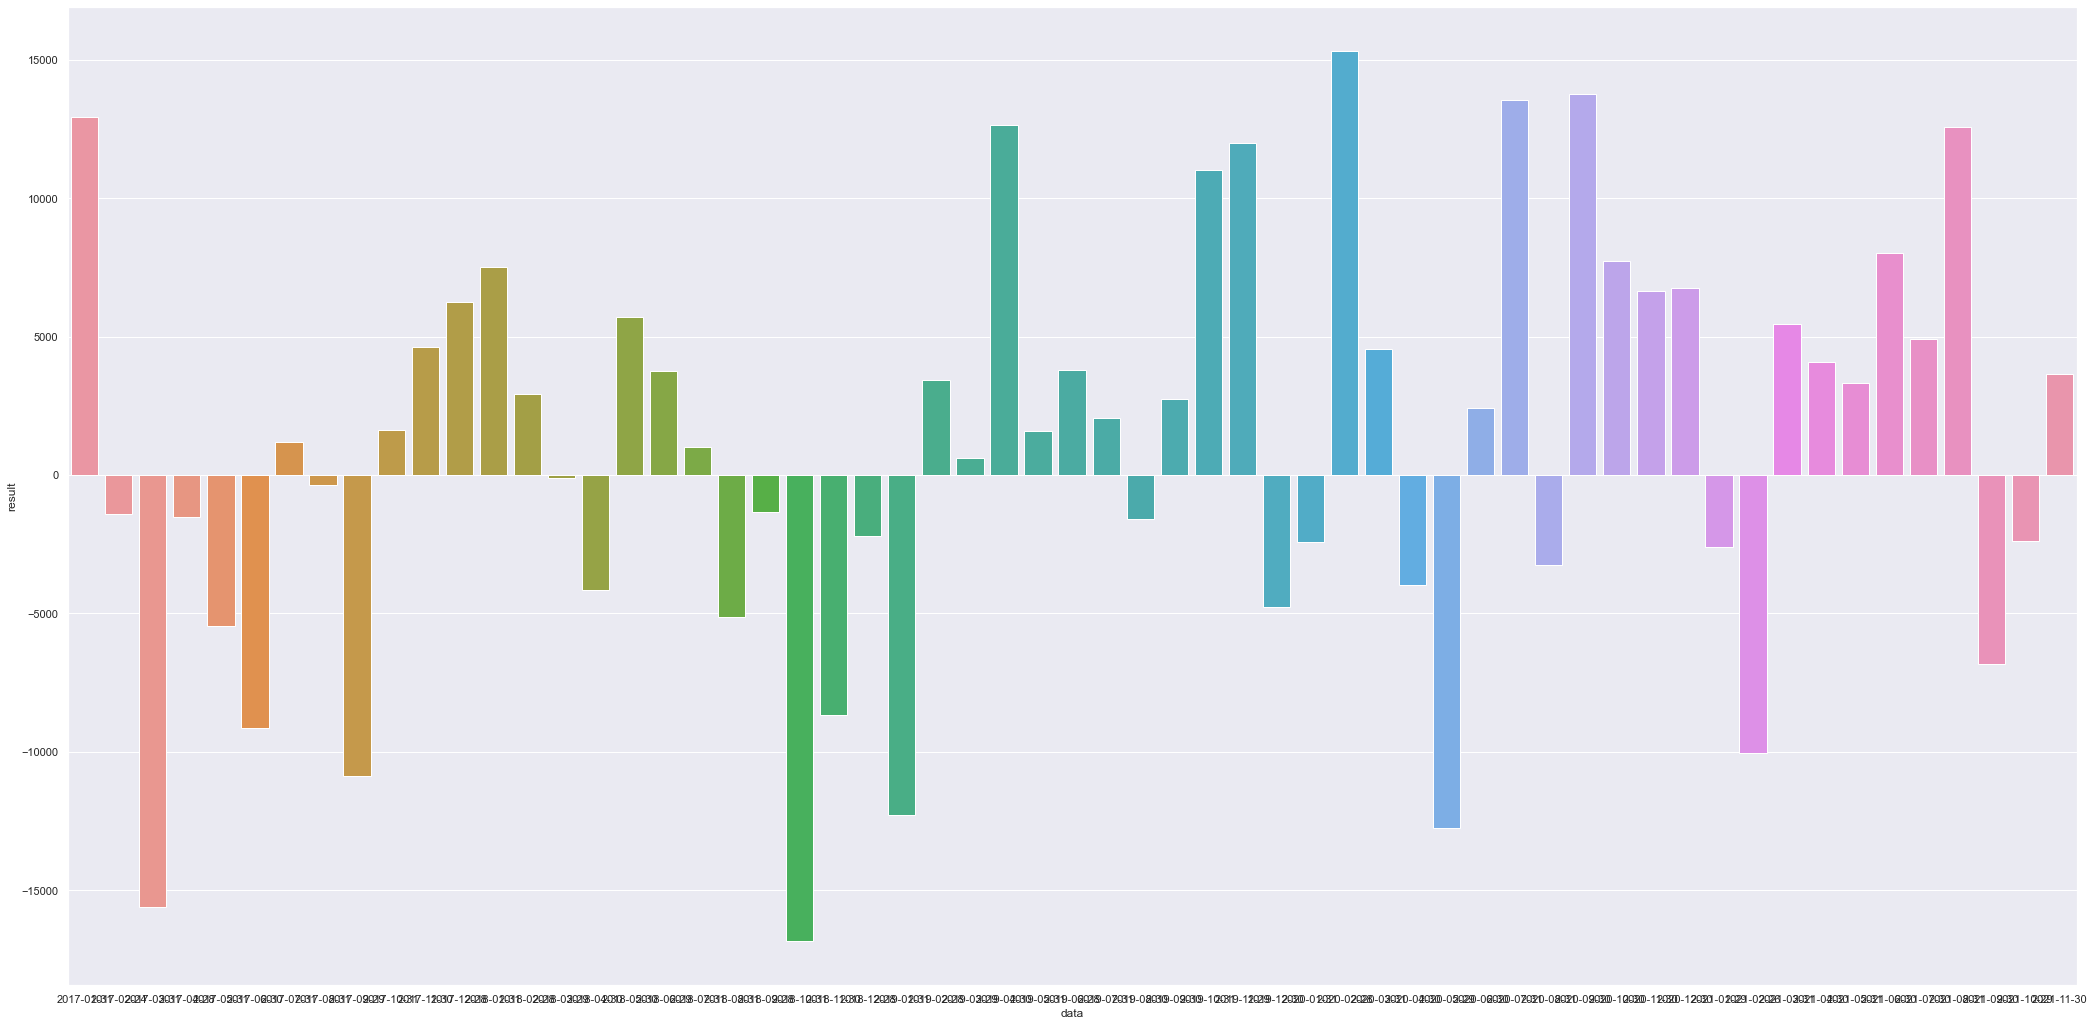

In [37]:
# Plot Bars
from matplotlib import pyplot as plt
import seaborn as sns

#plt.figure(figsize=(36, 18))
plt.gcf().set_size_inches(36, 18)
sns.set_theme(style="darkgrid")
plot = sns.barplot(x='data', y='result', data = mensal_result)

#### Best and worst month?

In [38]:
best_result = mensal_result.sort_values(by='result', ascending=False).head(1)
best_result

,data,result,return_pct
37,2020-02-28,15309.43,9.57


In [39]:
worse_result = mensal_result.sort_values(by='result', ascending=False).tail(1)
worse_result

,data,result,return_pct
21,2018-10-31,-16827.72,-10.52


#### Whats the mean return?

In [40]:
mensal_result.mean()

C:\Users\Atos\AppData\Local\Temp/ipykernel_14168/1660535763.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mensal_result.mean()


result       1093.58
return_pct      0.68
dtype: float64

#### Most negotiated stocks?

In [41]:
df2.reset_index().tickers.value_counts()

VVAR3     24
BIDI4     23
DMMO3     23
MGLU3     20
IRBR3     20
CIEL3     19
PRIO3     18
SULA11    16
CSNA3     16
AZUL4     16
COGN3     14
SAPR4     14
JBSS3     13
USIM5     13
ENEV3     13
VALE3     12
BRAP4     12
TOTS3     11
CCRO3     11
CMIG4     11
BRFS3     11
LAME4     11
NTCO3     11
CPLE6     11
BRDT3     10
LAME3     10
BPAC11     8
BBDC4      8
CSAN3      8
ITSA4      8
BRML3      7
EMBR3      7
PETR4      7
ABEV3      7
LWSA3      7
HAPV3      6
PETR3      5
BBAS3      5
ITUB4      5
NEOE3      1
Name: tickers, dtype: int64

#### PL Curve

In [42]:
capital = 160000 
df2['Equity'] = capital + df2.result.cumsum()
df2

,data,tickers,close_begin,close_last,result,return_pct,Equity
0,2017-01-31,MGLU3,0.49,0.79,12244.90,7.65,172244.90
1,2017-01-31,BRML3,11.82,12.02,338.41,0.21,172583.31
2,2017-01-31,CMIG4,5.82,6.80,3367.70,2.10,175951.01
3,2017-01-31,USIM5,4.73,4.44,-1226.22,-0.77,174724.79
4,2017-01-31,COGN3,12.55,12.70,-239.04,-0.15,174485.75
...,...,...,...,...,...,...,...
467,2021-11-30,IRBR3,4.31,4.02,-1345.71,-0.84,216519.59
468,2021-11-30,LWSA3,13.19,13.16,45.49,0.03,216565.08
469,2021-11-30,DMMO3,0.61,0.52,2950.82,1.84,219515.90
470,2021-11-30,BIDI4,11.95,9.54,4033.47,2.52,223549.37


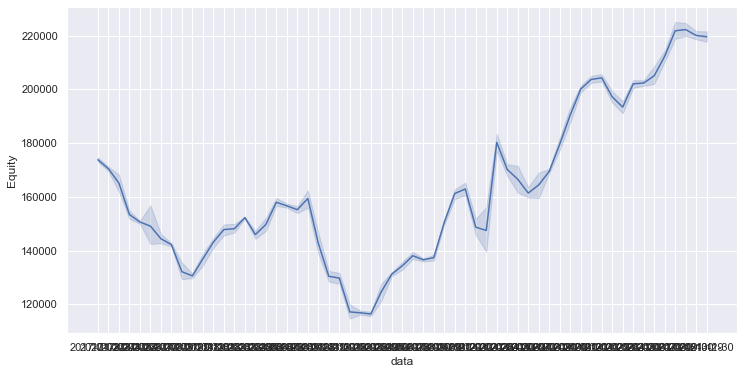

In [44]:
fig = plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
df2.reset_index() 
sns.lineplot(x='data', y='Equity', data=df2);

#### What's the worst drawdown?


In [45]:
df2.dropna(inplace=True)

In [47]:
max_dd = df2.Equity.sort_values(ascending=False).tail(1)
max_dd

199   112510.62
Name: Equity, dtype: float64

In [48]:
max_dd2 = (160000 - 112510.62) / 160000 * 100
print('{:0.2f}'.format(max_dd2),'%')

29.68 %


In [49]:
df2.sort_values(by='Equity', ascending=True).head(1)

,data,tickers,close_begin,close_last,result,return_pct,Equity
199,2019-01-31,NTCO3,23.57,24.11,-458.21,-0.29,112510.62


#### What's the highest PL moment?

In [50]:
df2.sort_values(by='Equity', ascending=False).head(1)

,data,tickers,close_begin,close_last,result,return_pct,Equity
447,2021-08-31,MGLU3,18.24,14.34,4276.32,2.67,230086.28


In [51]:
top_pl = (230086.28 - 160000) / 160000 * 100
print('{:0.2f}'.format(top_pl),'%')

43.80 %


#### What's the Sharpe-Ratio?

In [52]:
selic = pd.read_csv('C:/')
selic.drop(0, axis=0, inplace= True)
selic.reset_index(inplace=True)

In [54]:
capital = 160000 
mensal_result['Equity'] = capital + mensal_result.result.cumsum()
mensal_result['selic_M'] = selic['selic_mensal']
mensal_result['return_selic'] = capital * mensal_result['selic_M']
mensal_result['return_pct_selic'] = (mensal_result.return_selic / capital) * 100 
mensal_result['Equity_selic'] = capital + mensal_result.return_selic.cumsum()
mensal_result

,data,result,return_pct,Equity,selic_M,return_selic,return_pct_selic,Equity_selic
0,2017-01-31,12928.61,8.08,172928.61,0.01,1384.13,0.87,161384.13
1,2017-02-24,-1417.92,-0.89,171510.68,0.01,1683.29,1.05,163067.42
2,2017-03-31,-15607.89,-9.75,155902.79,0.01,1258.53,0.79,164325.95
3,2017-04-28,-1517.99,-0.95,154384.80,0.01,1483.41,0.93,165809.36
4,2017-05-31,-5452.50,-3.41,148932.30,0.01,1294.19,0.81,167103.56
5,2017-06-30,-9151.96,-5.72,139780.34,0.01,1276.68,0.80,168380.23
6,2017-07-31,1176.25,0.74,140956.59,0.01,1283.66,0.80,169663.89
7,2017-08-31,-360.23,-0.23,140596.36,0.01,1021.54,0.64,170685.43
8,2017-09-29,-10861.24,-6.79,129735.12,0.01,1030.29,0.64,171715.72
9,2017-10-31,1628.07,1.02,131363.20,0.01,909.10,0.57,172624.82


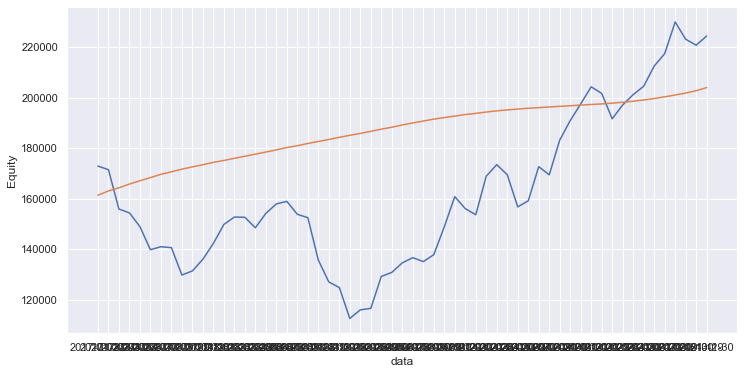

In [55]:
fig = plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='data', y='Equity', data=mensal_result);
sns.lineplot(x='data', y='Equity_selic', data=mensal_result);

In [56]:
sharp_ratio = (mensal_result['return_pct'].mean()-mensal_result['return_pct_selic'].mean()) / mensal_result['return_pct'].std()
sharp_ratio

0.04623786883307228

In [57]:
# 59 meses
a_sharp =  (59**0.5) * sharp_ratio
a_sharp

0.3551598095776596

#### What's the Value at Risk (VAR)?

In [58]:
var_level = 95
var_95 = np.percentile(mensal_result.return_pct, 100 - var_level)
print('{:0.2f}'.format(var_95),'%')

-7.70 %


#### What's the Conditional Value at Risk (CVAR)?

In [59]:
cvar_95 = (mensal_result.return_pct <= var_95).mean()
print('{:0.2f}'.format(cvar_95),'%')

0.05 %


#### What's the systematic sensitivity (IBOVESPA)?

In [60]:
ibov = pd.read_csv('C:/')
ibov.reset_index(inplace=True)
ibov.drop(['data', 'close'], 1, inplace=True)
ibov

C:\Users\Atos\AppData\Local\Temp/ipykernel_14168/3662612548.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ibov.drop(['data', 'close'], 1, inplace=True)


,index,return_ibov
0,2017-02-24,3.08
1,2017-03-31,-2.52
2,2017-04-28,0.65
3,2017-05-31,-4.12
4,2017-06-30,0.30
5,2017-07-31,4.80
6,2017-08-31,7.46
7,2017-09-29,4.88
8,2017-10-31,0.02
9,2017-11-30,-3.15


In [61]:
mensal_result['return_pct_ibov'] = ibov['return_ibov'] / 100
mensal_result['return_ibov'] =  capital * mensal_result['return_pct_ibov']
mensal_result['Equity_ibov'] = capital + mensal_result.return_ibov.cumsum()
mensal_result.to_csv("Momentum_final.csv")
mensal_result.to_excel("Momentum_final.xlsx")
mensal_result

,data,result,return_pct,Equity,selic_M,return_selic,return_pct_selic,Equity_selic,return_pct_ibov,return_ibov,Equity_ibov
0,2017-01-31,12928.61,8.08,172928.61,0.01,1384.13,0.87,161384.13,0.03,4926.66,164926.66
1,2017-02-24,-1417.92,-0.89,171510.68,0.01,1683.29,1.05,163067.42,-0.03,-4027.57,160899.09
2,2017-03-31,-15607.89,-9.75,155902.79,0.01,1258.53,0.79,164325.95,0.01,1032.08,161931.17
3,2017-04-28,-1517.99,-0.95,154384.80,0.01,1483.41,0.93,165809.36,-0.04,-6585.04,155346.13
4,2017-05-31,-5452.50,-3.41,148932.30,0.01,1294.19,0.81,167103.56,0.00,480.93,155827.06
5,2017-06-30,-9151.96,-5.72,139780.34,0.01,1276.68,0.80,168380.23,0.05,7683.03,163510.09
6,2017-07-31,1176.25,0.74,140956.59,0.01,1283.66,0.80,169663.89,0.07,11928.79,175438.89
7,2017-08-31,-360.23,-0.23,140596.36,0.01,1021.54,0.64,170685.43,0.05,7811.84,183250.73
8,2017-09-29,-10861.24,-6.79,129735.12,0.01,1030.29,0.64,171715.72,0.00,32.28,183283.01
9,2017-10-31,1628.07,1.02,131363.20,0.01,909.10,0.57,172624.82,-0.03,-5033.07,178249.94


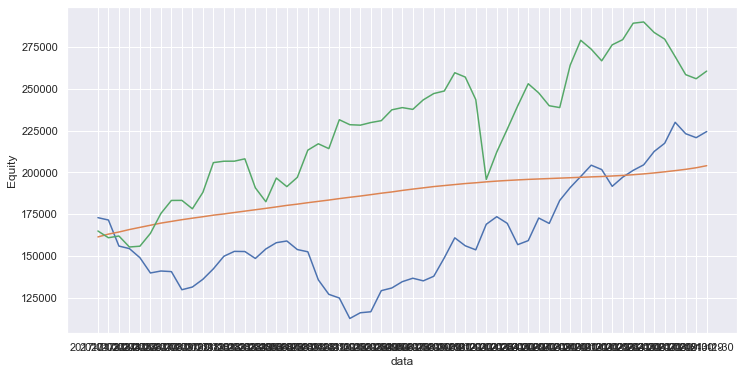

In [63]:
fig = plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='data', y='Equity', data=mensal_result);
sns.lineplot(x='data', y='Equity_selic', data=mensal_result);
sns.lineplot(x='data', y='Equity_ibov', data=mensal_result);

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

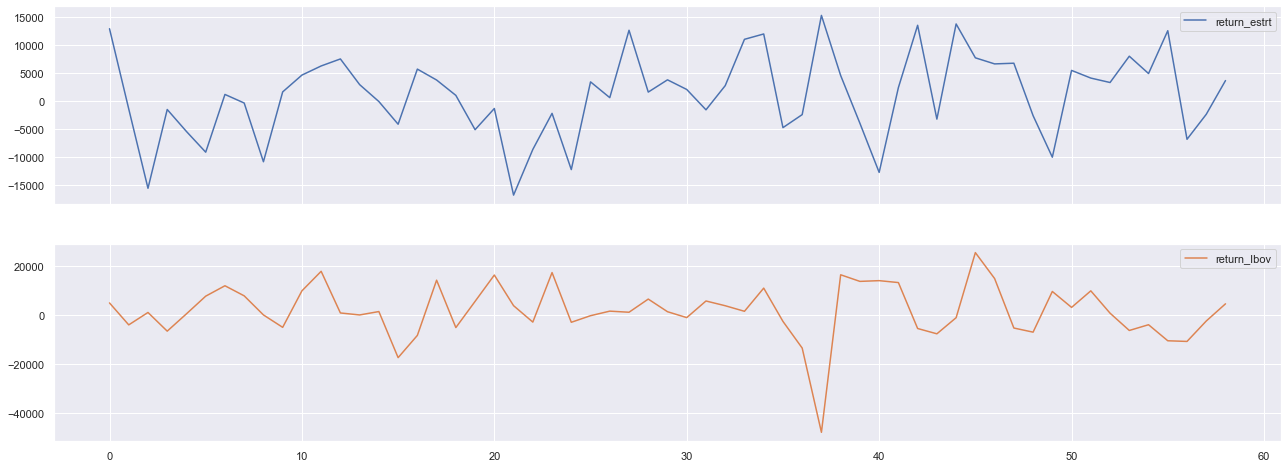

In [64]:
corr_ibov_estr = pd.DataFrame()
corr_ibov_estr['date'] = mensal_result['data']
corr_ibov_estr['return_estrt'] = mensal_result['result']
corr_ibov_estr['return_Ibov'] = mensal_result['return_ibov']
corr_ibov_estr.plot(subplots=True, figsize=(22,8))

In [65]:
corr_ibov_estr.corr()

,return_estrt,return_Ibov
return_estrt,1.00,-0.11
return_Ibov,-0.11,1.00


<AxesSubplot:>

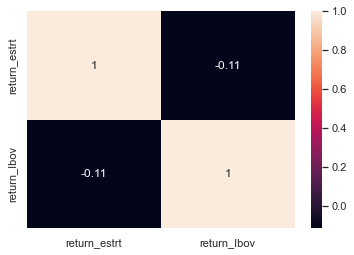

In [66]:
sns.heatmap(corr_ibov_estr.corr(), annot=True)

<AxesSubplot:>

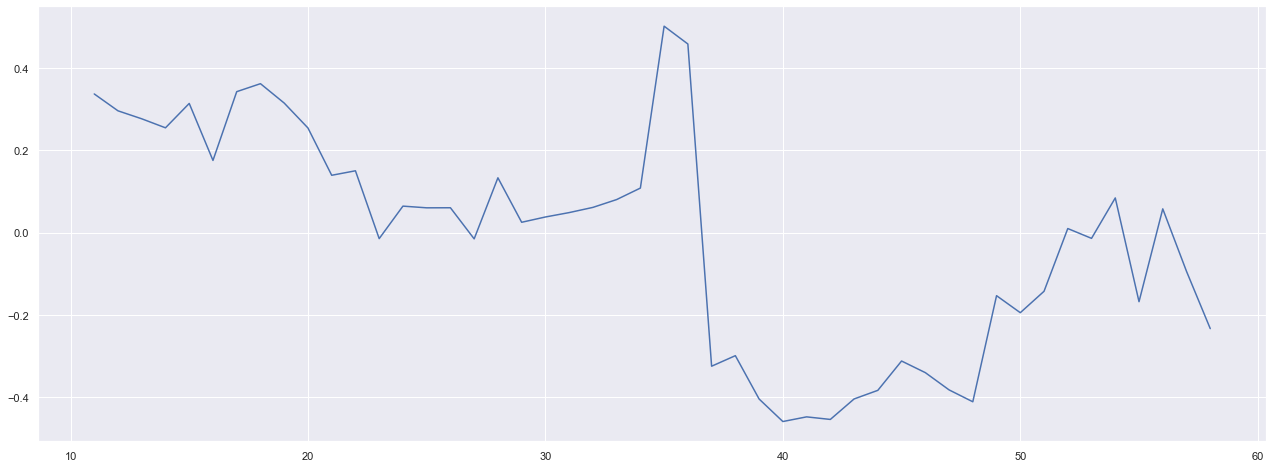

In [69]:
corr_ibov_estr['return_estrt'].rolling(12).corr(corr_ibov_estr['return_Ibov']).plot(figsize=(22,8))

# DF com info adicional

#### Best Results 

In [70]:
momentum_best_month = pd.DataFrame()

In [72]:
best_result_momentum = mensal_result.sort_values(by='result', ascending=False).head(1)
best_result_momentum = best_result_momentum.iloc[:, 0:3]
best_result_momentum 

,data,result,return_pct
37,2020-02-28,15309.43,9.57


In [73]:
best_result_ibov = mensal_result.sort_values(by='return_ibov', ascending=False).head(1)
best_result_ibov = best_result_ibov.iloc[:, [0,9,8]]
best_result_ibov

,data,return_ibov,return_pct_ibov
45,2020-10-30,25444.24,0.16


In [74]:
best_result_selic = mensal_result.sort_values(by='return_selic', ascending=False).head(1)
best_result_selic = best_result_selic.iloc[:, [0,5,6]]
best_result_selic

,data,return_selic,return_pct_selic
1,2017-02-24,1683.29,1.05


In [75]:
momentum_best_month = pd.concat([best_result_momentum, best_result_ibov, best_result_selic])
#momentum_best_month.to_excel("best_months.xlsx")

In [76]:
mensal_result.sort_values(by='return_selic', ascending=False).head(1)

,data,result,return_pct,Equity,selic_M,return_selic,return_pct_selic,Equity_selic,return_pct_ibov,return_ibov,Equity_ibov
1,2017-02-24,-1417.92,-0.89,171510.68,0.01,1683.29,1.05,163067.42,-0.03,-4027.57,160899.09


#### Worst results

In [77]:
momentum_worst_month = pd.DataFrame()

In [79]:
worst_result_momentum = mensal_result.sort_values(by='result', ascending=False).tail(1)
worst_result_momentum = worst_result_momentum.iloc[:, 0:3]
worst_result_momentum 

,data,result,return_pct
21,2018-10-31,-16827.72,-10.52


In [80]:
worst_result_ibov = mensal_result.sort_values(by='return_ibov', ascending=False).tail(1)
worst_result_ibov['return_pct_ibov'] = worst_result_ibov['return_pct_ibov'] * 100
worst_result_ibov = worst_result_ibov.iloc[:, [0,9,8]]
worst_result_ibov

,data,return_ibov,return_pct_ibov
37,2020-02-28,-47846.93,-29.90


In [81]:
worst_result_selic = mensal_result.sort_values(by='return_selic', ascending=False).tail(1)
worst_result_selic = worst_result_selic.iloc[:, [0,5,6]]
worst_result_selic

,data,return_selic,return_pct_selic
48,2021-01-29,215.24,0.13


In [82]:
momentum_worst_month = pd.concat([worst_result_momentum, worst_result_ibov, worst_result_selic])
# momentum_worst_month.to_excel("worst_months.xlsx")

In [83]:
momentum_worst_month

,data,result,return_pct,return_ibov,return_pct_ibov,return_selic,return_pct_selic
21,2018-10-31,-16827.72,-10.52,NaN,NaN,NaN,NaN
37,2020-02-28,NaN,NaN,-47846.93,-29.90,NaN,NaN
48,2021-01-29,NaN,NaN,NaN,NaN,215.24,0.13


#### Most negotiated stocks

In [84]:
most_stocks = pd.DataFrame()
most_stocks['most negotiated stocks'] = df2.reset_index().tickers.value_counts()
# most_stocks.to_excel("most_stocks.xlsx")

In [85]:
most_stocks

,most negotiated stocks
VVAR3,24
BIDI4,23
DMMO3,23
MGLU3,20
IRBR3,20
CIEL3,19
PRIO3,18
SULA11,16
CSNA3,16
AZUL4,16


#### Final Details

In [86]:
details = pd.read_excel('C:/')

In [87]:
details

,Maximum Drawdown,Highest Equity Moment,Sharpe-Ratio,Value at Risk (VAR),Conditional Value at Risk (CVAR),Correlation Ibovespa
0,29.68,43.80,0.05,-7.70,0.05,-0.11


In [ ]:
# details.to_excel("details.xlsx")